In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pylab import rcParams

%run GR

In [2]:
#read in raw data and extract mean growth rates
GDats = process_GR('Emma Tet Strains.csv', starting_row=0, normalise=True, control_condition="R1158")
GDats.groupby('Plasmid').mean()

,Rel_GR
Plasmid,
R+0.02,0.985906
R+0.1,0.988050
R1158,1.000000
Tet+0.02,0.791907
Tet+0.1,0.236332
Tet-pdi1,0.872701


In [8]:
GDats = pd.read_csv('TetPdiGrowth.csv')
GDats_plot = GDats.loc[GDats['Plasmid'] != 'R1158']
GDats_plot.head()

,Plasmid,Conc,Rel_GR
4,Tet-pdi1,0.00,0.866178
5,Tet-pdi1,0.00,0.864204
6,Tet-pdi1,0.00,0.879123
7,Tet-pdi1,0.00,0.881300
8,Tet+0.02,0.02,0.780713


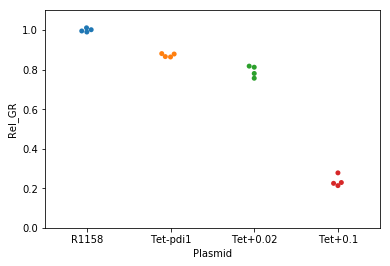

In [9]:
plt.close()
ax = sns.swarmplot(x='Plasmid', y='Rel_GR', data=GDats)
plt.ylim(0,1.1)
plt.savefig('relpdi.svg')
plt.show()

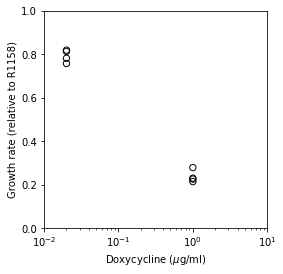

In [10]:
plt.close()
f, ax = plt.subplots(figsize=(4,4))
ax.set_xscale("log")
ax.scatter(x = 'Conc', y = 'Rel_GR', data = GDats_plot, s = 40, facecolors = 'none', edgecolors = 'black')
ax.set(ylim=(0,1),xlim = (0.01,10), ylabel='Growth rate (relative to R1158)', xlabel = r'Doxycycline ($\mu$g/ml)')
plt.savefig('Pdiconcs.svg')
plt.show()

In [7]:
raw = pd.read_csv('Emma Tet Strains.csv')
raw['Sample'][0:6]

0       R1158
1    Tet-pdi1
2      R+0.02
3    Tet+0.02
4       R+0.1
5     Tet+0.1
Name: Sample, dtype: object

In [16]:
# define the number last time point to use (the last time used in hours = end /2)
end = 35
#extract data for conditions of interest and average all data for that condition
x = [float(i) for i in list(raw.columns[4:end])]
wt = raw.loc[raw['Sample'] == 'R1158'].iloc[:,4:end].mean()
Tet0 = raw.loc[raw['Sample'] == 'Tet-pdi1'].iloc[:,4:end].mean()
Tet20 = raw.loc[raw['Sample'] == 'Tet+0.02'].iloc[:,4:end].mean()
Tet100 = raw.loc[raw['Sample'] == 'Tet+0.1'].iloc[:,4:end].mean()

# normalise all growth curves to the same starting oD 
refoD = min(wt[0],Tet0[0],Tet20[0], Tet100[0])
wt = wt - (wt[0] - refoD)
Tet0 = Tet0 - (Tet0[0] - refoD)
Tet20 = Tet20 - (Tet20[0] - refoD)
Tet100 = Tet100 - (Tet100[0] - refoD)

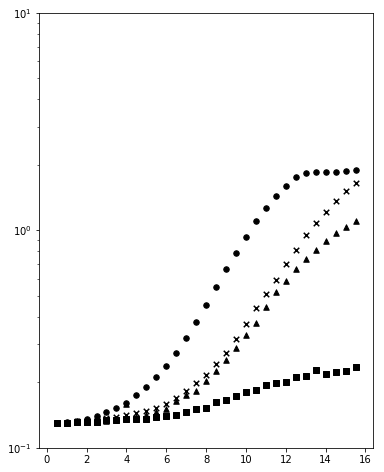

In [31]:
plt.close()
size = 30
plt.scatter(x=x,y=wt, marker = 'o', c='black', s=size)
plt.scatter(x=x,y=Tet0, marker = 'x', c='black', s=size)
plt.scatter(x=x,y=Tet20, marker = '^', c='black', s=size)
plt.scatter(x=x,y=Tet100, marker = 's', c='black', s=size)
plt.yscale("log")
plt.ylim(0.1,10)
rcParams['figure.figsize'] = 6,8
plt.savefig('TetPDI1.svg')
plt.show()